In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from datetime import datetime
from ema_workbench import load_results

In [2]:
experiment_datetime = "20230613T1415" ## change these 2 lines based on filename you want to read in
experiment_type = "generate_all" ## "fixed_policies" or "generate_all"
if experiment_type == "fixed_policies":
    results = load_results('./output/' + experiment_datetime + '_results__policies_fixed__scenarios_generated')
elif experiment_type == "generate_all":
    results = load_results('./output/' + experiment_datetime + '_results__all_generated')
else:
    results = load_results('./output/FILENOTFOUND')

In [3]:
experiments, outcomes = results
experiments_df = pd.DataFrame(experiments)
outcomes_df = pd.DataFrame(outcomes)

It might not be possible to just cut of parts of the experiments and outcomes dataframes since they are linked?

In [4]:
experiments_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   A.0_ID flood wave shape  1000 non-null   int64  
 1   A.1_Bmax                 1000 non-null   float64
 2   A.1_Brate                1000 non-null   float64
 3   A.1_pfail                1000 non-null   float64
 4   A.2_Bmax                 1000 non-null   float64
 5   A.2_Brate                1000 non-null   float64
 6   A.2_pfail                1000 non-null   float64
 7   A.3_Bmax                 1000 non-null   float64
 8   A.3_Brate                1000 non-null   float64
 9   A.3_pfail                1000 non-null   float64
 10  A.4_Bmax                 1000 non-null   float64
 11  A.4_Brate                1000 non-null   float64
 12  A.4_pfail                1000 non-null   float64
 13  A.5_Bmax                 1000 non-null   float64
 14  A.5_Brate                

In [5]:
experiments_df = experiments_df.loc[:, ['A.4_Bmax',"A.4_Brate", 'A.4_pfail', 'A.4_DikeIncrease 0', "A.4_DikeIncrease 1", "A.4_DikeIncrease 2", "scenario", "policy" ]] 
experiments_df

,A.4_Bmax,A.4_Brate,A.4_pfail,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,scenario,policy
0,273.740734,1.5,0.799619,10,5,4,10,0
1,212.623852,10.0,0.523337,10,5,4,11,0
2,35.830020,10.0,0.589377,10,5,4,12,0
3,298.070019,1.5,0.055893,10,5,4,13,0
4,218.402936,1.0,0.718029,10,5,4,14,0
...,...,...,...,...,...,...,...,...
995,272.195672,10.0,0.180605,2,2,10,105,9
996,38.991334,1.0,0.493860,2,2,10,106,9
997,306.108516,10.0,0.952017,2,2,10,107,9
998,127.951969,10.0,0.254531,2,2,10,108,9


In [6]:
outcomes_df

,A.1 Expected Annual Damage,A.1 Expected Number of Deaths,A.2 Expected Annual Damage,A.2 Expected Number of Deaths,A.3 Expected Annual Damage,A.3 Expected Number of Deaths,A.4 Expected Annual Damage,A.4 Expected Number of Deaths,A.5 Expected Annual Damage,A.5 Expected Number of Deaths,Total Infrastructure Costs,Total Expected Annual Damage,Total Expected Number of Deaths
0,1.561128e+06,0.000527,7.845950e+05,0.000411,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,1.190425e+09,2.345723e+06,0.000938
1,0.000000e+00,0.000000,8.033328e+07,0.030830,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,1.190425e+09,8.033328e+07,0.030830
2,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,1.190425e+09,0.000000e+00,0.000000
3,0.000000e+00,0.000000,4.183753e+06,0.001779,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,1.190425e+09,4.183753e+06,0.001779
4,0.000000e+00,0.000000,2.636981e+06,0.001356,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,1.190425e+09,2.636981e+06,0.001356
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,3.907057e+06,0.001961,0.000000e+00,0.000000,1.518598e+09,3.907057e+06,0.001961
996,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,1.019564e+07,0.011347,1.518598e+09,1.019564e+07,0.011347
997,6.897961e+06,0.006474,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,1.518598e+09,6.897961e+06,0.006474
998,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,3.641417e+06,0.001492,0.000000e+00,0.000000,1.518598e+09,3.641417e+06,0.001492


## Dimensional stacking (Fixed Policies)

Compares all the uncertainties/ model levers with one outcome. 


C:\Users\michiel\miniconda3\envs\gds\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


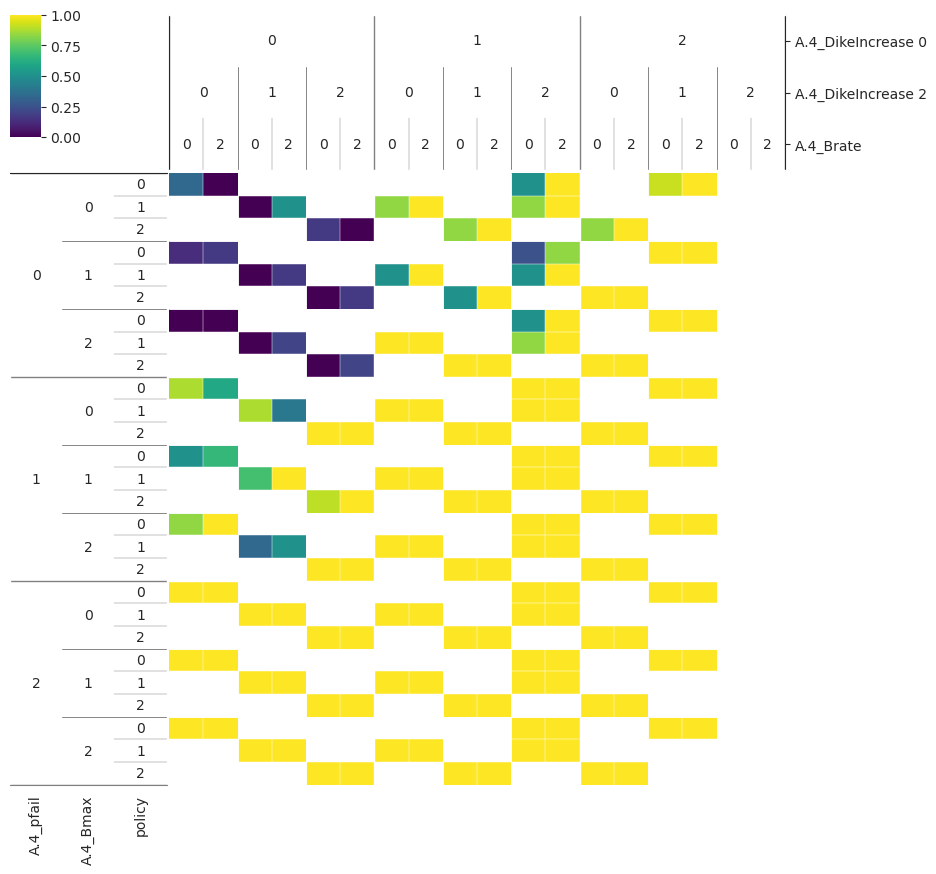

In [21]:
from ema_workbench.analysis import dimensional_stacking

x = experiments_df
y = outcomes_df["A.4 Expected Annual Damage"] < 1000000 
dimensional_stacking.create_pivot_plot(x, y,3 , nbins=3) 
plt.show()

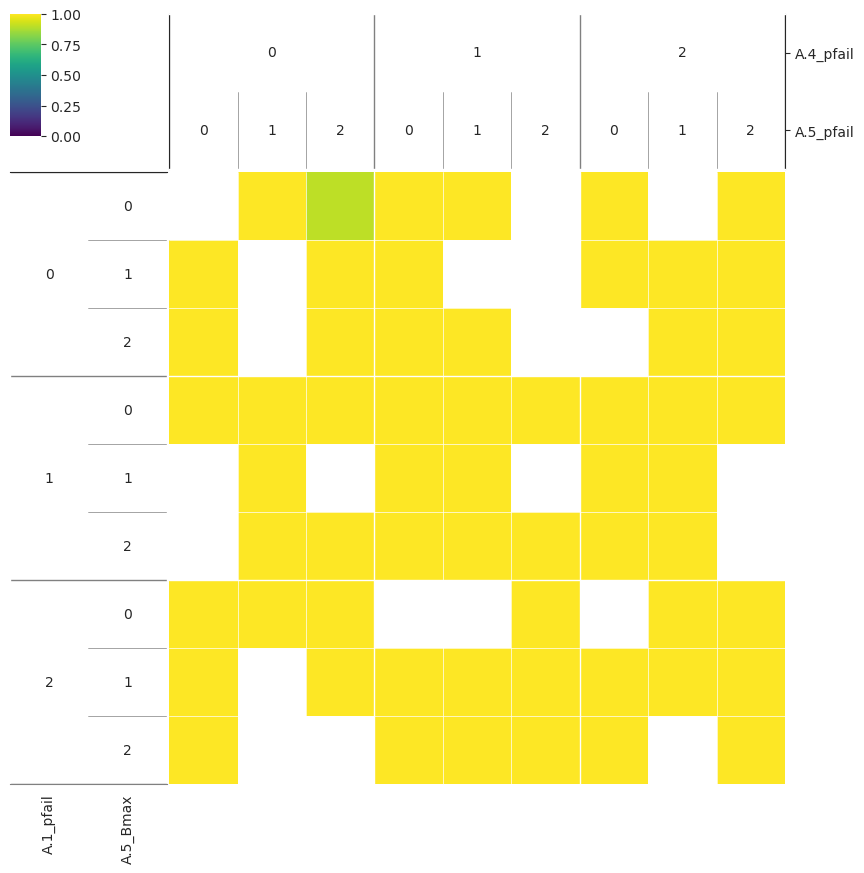

In [8]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes["A.4 Expected Number of Deaths"] < 0.02
dimensional_stacking.create_pivot_plot(x, y,2 , nbins=3)
plt.show()